# Importing Packages

In [34]:

from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns


# Getting Data

In [56]:
time = pd.read_csv("time.csv")

In [57]:
x = pd.read_csv("Films_details.csv")

In [58]:
x

,Unnamed: 0,Title,Year,Duration,Genre,Rating,Description,Director,Stars
0,0,The Mountain II,(2016),135 min,"Action, Drama, War",8.8,In a desolate war zone where screams of the in...,Alper Caglar,"Ertugrul,,Ufuk,Bayraktar,,Ahu,Türkpençe,,Murat..."
1,1,Saving Private Ryan,(1998),169 min,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",Steven Spielberg,"Hanks,,Matt,Damon,,Tom,Sizemore,,Edward,Burns"
2,2,Life Is Beautiful,(1997),116 min,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,Roberto Benigni,"Benigni,,Nicoletta,Braschi,,Giorgio,Cantarini,..."
3,3,The Pianist,(2002),150 min,"Biography, Drama, Music",8.5,A Polish Jewish musician struggles to survive ...,Roman Polanski,"Brody,,Thomas,Kretschmann,,Frank,Finlay,,Emili..."
4,4,Grave of the Fireflies,(1988),89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,Isao Takahata,"Tatsumi,,Ayano,Shiraishi,,Akemi,Yamaguchi,,Yos..."
...,...,...,...,...,...,...,...,...,...
95,95,From Here to Eternity,(1953),118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,"Lancaster,,Montgomery,Clift,,Deborah,Kerr,,Don..."
96,96,Lifeboat,(1944),97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,"Bankhead,,John,Hodiak,,Walter,Slezak,,William,..."
97,97,Son of Saul,(2015),107 min,"Drama, War",7.5,A Jewish-Hungarian concentration camp prisoner...,László Nemes,"Röhrig,,Levente,Molnár,,Urs,Rechn,,Todd,Charmont"
98,98,Lone Survivor,(2013),121 min,"Action, Biography, Drama",7.5,Marcus Luttrell and his team set out on a miss...,Peter Berg,"Wahlberg,,Taylor,Kitsch,,Emile,Hirsch,,Ben,Foster"


In [59]:
War = pd.concat([x,time],axis=1)

In [60]:
War.keys()

Index(['Unnamed: 0', 'Title', 'Year', 'Duration', 'Genre', 'Rating',
       'Description', 'Director', 'Stars', 'Unnamed: 0', 'Unnamed: 0.1',
       'Filming Dates'],
      dtype='object')

In [61]:
War = War.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [62]:
War.keys()

Index(['Title', 'Year', 'Duration', 'Genre', 'Rating', 'Description',
       'Director', 'Stars', 'Filming Dates'],
      dtype='object')

In [63]:
War

,Title,Year,Duration,Genre,Rating,Description,Director,Stars,Filming Dates
0,The Mountain II,(2016),135 min,"Action, Drama, War",8.8,In a desolate war zone where screams of the in...,Alper Caglar,"Ertugrul,,Ufuk,Bayraktar,,Ahu,Türkpençe,,Murat...",No Dates available
1,Saving Private Ryan,(1998),169 min,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",Steven Spielberg,"Hanks,,Matt,Damon,,Tom,Sizemore,,Edward,Burns",27 June 1997 - 13 September 1997
2,Life Is Beautiful,(1997),116 min,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,Roberto Benigni,"Benigni,,Nicoletta,Braschi,,Giorgio,Cantarini,...",June 1997 - 5 September 1997
3,The Pianist,(2002),150 min,"Biography, Drama, Music",8.5,A Polish Jewish musician struggles to survive ...,Roman Polanski,"Brody,,Thomas,Kretschmann,,Frank,Finlay,,Emili...",19 February 2001 - July 2001
4,Grave of the Fireflies,(1988),89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,Isao Takahata,"Tatsumi,,Ayano,Shiraishi,,Akemi,Yamaguchi,,Yos...",No Dates available
...,...,...,...,...,...,...,...,...,...
95,From Here to Eternity,(1953),118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,"Lancaster,,Montgomery,Clift,,Deborah,Kerr,,Don...",7 March 1953 - 5 May 1953
96,Lifeboat,(1944),97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,"Bankhead,,John,Hodiak,,Walter,Slezak,,William,...",3 August 1943 - 17 November 1943
97,Son of Saul,(2015),107 min,"Drama, War",7.5,A Jewish-Hungarian concentration camp prisoner...,László Nemes,"Röhrig,,Levente,Molnár,,Urs,Rechn,,Todd,Charmont",No Dates available
98,Lone Survivor,(2013),121 min,"Action, Biography, Drama",7.5,Marcus Luttrell and his team set out on a miss...,Peter Berg,"Wahlberg,,Taylor,Kitsch,,Emile,Hirsch,,Ben,Foster",2 October 2012


# Normalizing Data


In [64]:
normalized_Ratings_series=(War["Rating"]-War["Rating"].min())/(War["Rating"].max()-War["Rating"].min())
normalized_ratings=pd.DataFrame(normalized_Ratings_series)
normalized_ratings

,Rating
0,1.000000
1,0.846154
2,0.846154
3,0.769231
4,0.769231
...,...
95,0.076923
96,0.076923
97,0.000000
98,0.000000


# Graphs


In [65]:
Y = War.sort_values(['Year'], ascending=True)

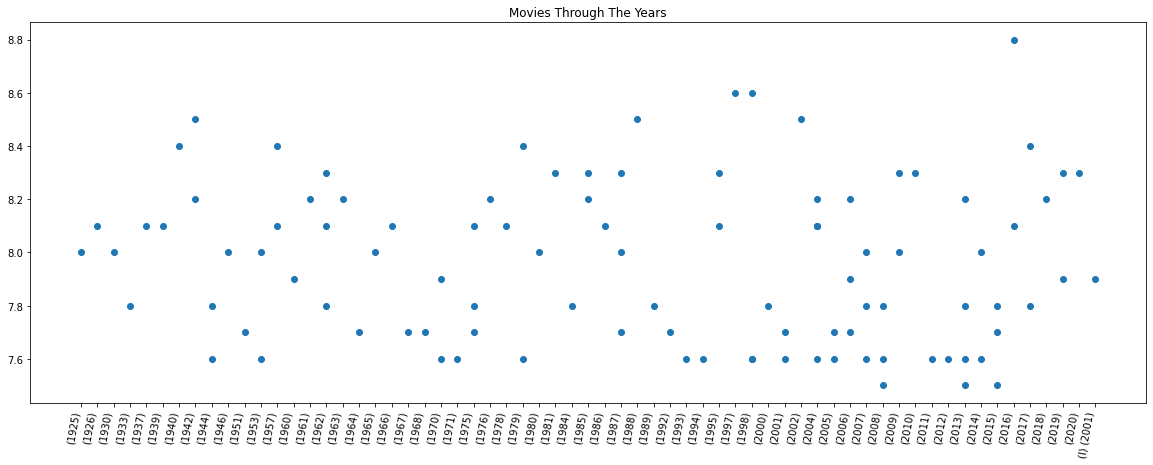

In [73]:
# Movies' Rating by Year.


plt.figure(figsize=(20,7))
plt.xticks(rotation=80, ha='right')
plt.scatter(Y['Year'],Y['Rating'])
plt.title("Movies Through The Years")
plt.show()

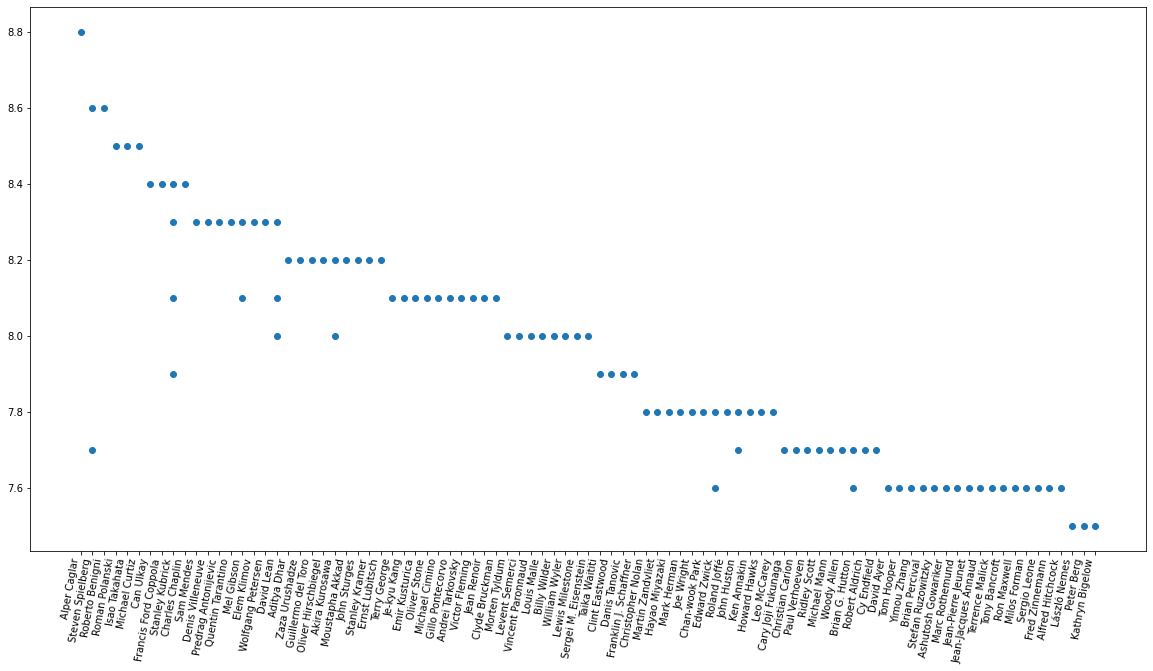

In [74]:
# Number Movies' in top 100 by Director.
plt.figure(figsize=(20,10))
plt.xticks(rotation=80, ha='right')
plt.scatter(War['Director'],War['Rating'])
plt.show()

In [75]:
 War.sort_values(['Duration'], ascending=True)

,Title,Year,Duration,Genre,Rating,Description,Director,Stars,Filming Dates
57,Land of Mine,(2015),100 min,"Drama, History, War",7.8,"In post-World War II Denmark, a group of young...",Martin Zandvliet,"Møller,,Louis,Hofmann,,Joel,Basman,,Mikkel,Boe...",July 2014 - August 2014
66,To Have and Have Not,(1944),100 min,"Adventure, Comedy, Film-Noir",7.8,"During World War II, American expatriate Harry...",Howard Hawks,"Bogart,,Lauren,Bacall,,Walter,Brennan,,Dolores...",29 February 1944 - 10 May 1944
5,Casablanca,(1942),102 min,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,Michael Curtiz,"Bogart,,Ingrid,Bergman,,Paul,Henreid,,Claude,R...",25 May 1942 - 3 August 1942
44,Au Revoir les Enfants,(1987),104 min,"Drama, War",8.0,A French boarding school run by priests seems ...,Louis Malle,"Manesse,,Raphael,Fejtö,,Francine,Racette,,Stan...",2 February 1987
78,The African Queen,(1951),105 min,"Adventure, Drama, Romance",7.7,"In WWI Africa, a gin-swilling riverboat captai...",John Huston,"Bogart,,Katharine,Hepburn,,Robert,Morley,,Pete...",May 1951 - August 1951
...,...,...,...,...,...,...,...,...,...
96,Lifeboat,(1944),97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,"Bankhead,,John,Hodiak,,Walter,Slezak,,William,...",3 August 1943 - 17 November 1943
53,No Man's Land,(I) (2001),98 min,"Comedy, Drama, War",7.9,Bosnia and Herzegovina during 1993 at the time...,Danis Tanovic,"Djuric,,Rene,Bitorajac,,Filip,Sovagovic,,Georg...",No Dates available
27,To Be or Not to Be,(1942),99 min,"Comedy, War",8.2,"During the Nazi occupation of Poland, an actin...",Ernst Lubitsch,"Lombard,,Jack,Benny,,Robert,Stack,,Felix,Bressart",6 November 1941 - 24 December 1941
83,The Counterfeiters,(2007),99 min,"Crime, Drama, History",7.6,"The story of the Operation Bernhard, the large...",Stefan Ruzowitzky,"Markovics,,August,Diehl,,Devid,Striesow,,Marti...",21 March 2006 - 4 May 2006


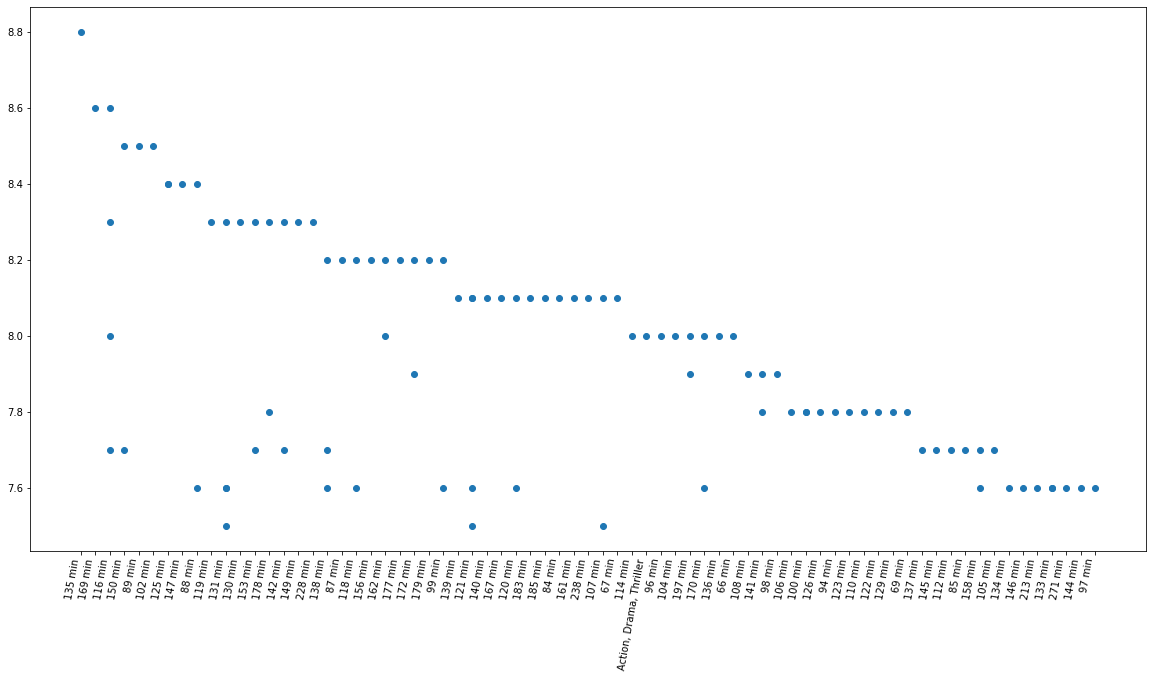

In [77]:
ax=plt.figure(figsize=(20,10))
ax= plt.xticks(rotation=80, ha='right')
ax= plt.scatter(War['Duration'],War['Rating'])
plt.show()

In [78]:
War.describe()

,Rating
count,100.000000
mean,7.960000
std,0.302181
min,7.500000
25%,7.700000
50%,8.000000
75%,8.200000
max,8.800000


In [79]:
War['Duration'].value_counts()

116 min    4
131 min    4
121 min    4
138 min    3
120 min    2
          ..
123 min    1
183 min    1
89 min     1
94 min     1
228 min    1
Name: Duration, Length: 71, dtype: int64

In [53]:
Top10 = War.sort_values(['Rating'], ascending=False).head(10)

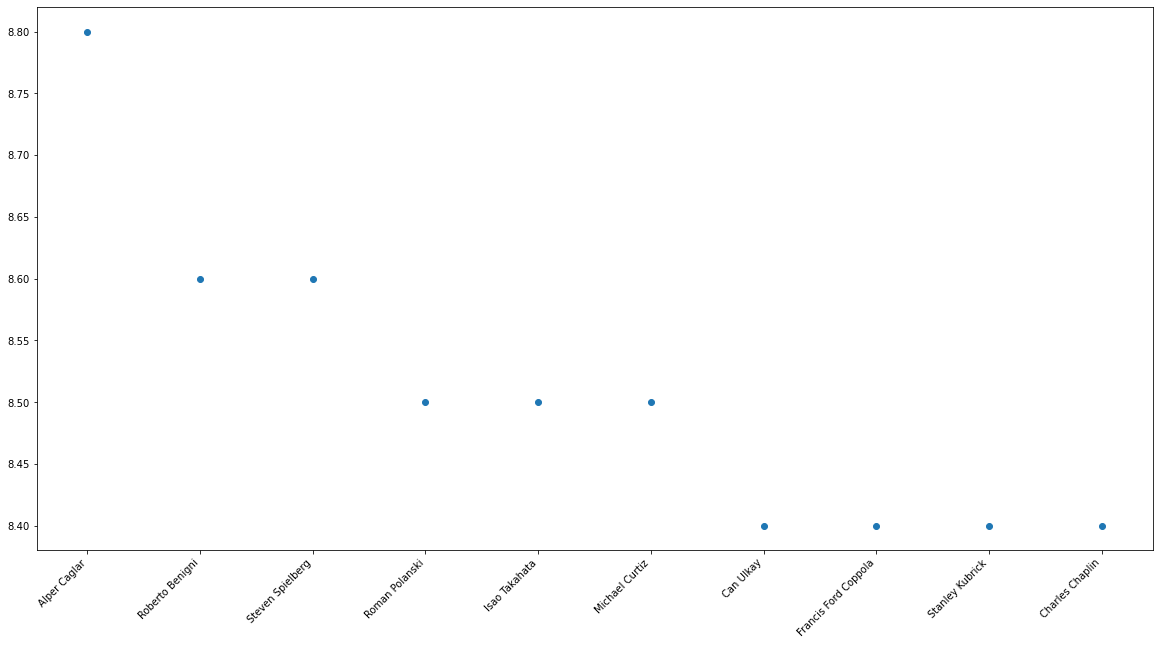

In [80]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(Top10['Director'],Top10['Rating'])

plt.show()

In [82]:
# plt.figure(figsize=(30,20))
# t = War.groupby(['Director']).count()


<Figure size 2160x1440 with 0 Axes>

In [86]:
T= t.sort_values(['Rating'], ascending=False).head(10)

Text(0.5, 1.0, 'Number of Movies by Directors in Top 100')

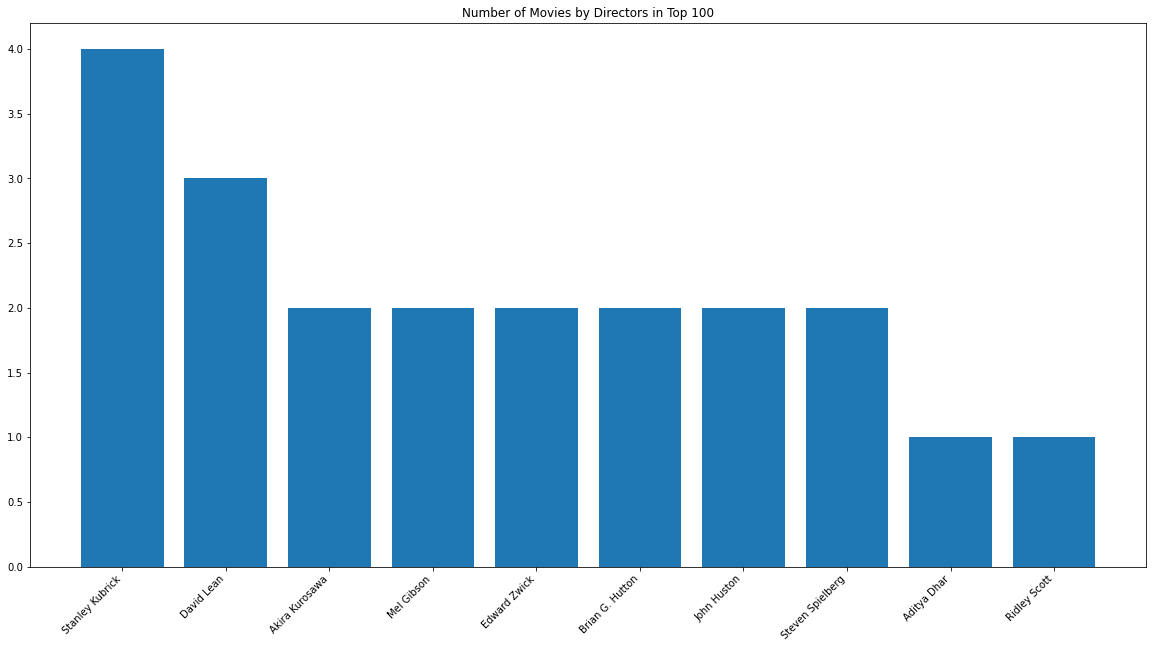

In [88]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.bar(T.index,T["Rating"])
plt.title("Number of Movies by Directors in Top 100")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86193761-2877-467f-bcb9-1f0b66feed89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>